In [10]:
%matplotlib inline
import pdb

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

## Download dataset
## Define data loader and transformation

In [3]:
transform = transforms.Compose([transforms.ToTensor(), 
                                transforms.Normalize((0.5, 0.5, 0.5), 
                                                     (0.5, 0.5, 0.5))])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, 
                                        transform=transform, 
                                        download=True)
trainloader = torch.utils.data.DataLoader(dataset=trainset, batch_size=4, 
                                          shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=True, 
                                        transform=transform, 
                                        download=True)
testloader =  torch.utils.data.DataLoader(dataset=testset, batch_size=4, 
                                          shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 
           'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [4]:
import matplotlib.pyplot as plt
import numpy as np

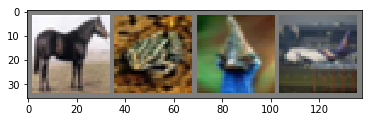

horse  frog  bird plane


In [5]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy() # convert tensor to numpy
    plt.imshow(np.transpose(npimg, (1, 2, 0))) # convert (C,H,W) to (H,W,C)
    plt.show()

dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

## Define the network

In [12]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        self.fc1 = nn.Linear(in_features=16 * 5 * 5, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=84)
        self.fc3 = nn.Linear(in_features=84, out_features=10)
        
    def forward(self, x):
#         pdb.set_trace()
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5) # flatten
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()

In [7]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

## Train network

In [ ]:
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data # get data
        optimizer.zero_grad() # zero the parameter gradients
        # forward + backward + optimize
        outputs = net(inputs)
        pdb.set_trace()
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() # calc total loss of 2000 data
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
            
print('Finished training')

> <ipython-input-13-b8b7306c12f8>(9)<module>()
-> loss = criterion(outputs, labels)
(Pdb) outputs.shape
torch.Size([4, 10])
(Pdb) labels.shape
torch.Size([4])
(Pdb) outputs[:2]
tensor([[ 0.1187, -0.0608,  0.0792, -0.0157, -0.0232,  0.0822, -0.0241,  0.0738,
         -0.0176,  0.0204],
        [ 0.1220, -0.0547,  0.0707, -0.0054, -0.0320,  0.0788, -0.0270,  0.0765,
         -0.0040,  0.0157]], grad_fn=<SliceBackward>)
(Pdb) outputs[1].item()
*** ValueError: only one element tensors can be converted to Python scalars
(Pdb) outputs[1]
tensor([ 0.1220, -0.0547,  0.0707, -0.0054, -0.0320,  0.0788, -0.0270,  0.0765,
        -0.0040,  0.0157], grad_fn=<SelectBackward>)
(Pdb) outputs[1].cpu()
tensor([ 0.1220, -0.0547,  0.0707, -0.0054, -0.0320,  0.0788, -0.0270,  0.0765,
        -0.0040,  0.0157], grad_fn=<SelectBackward>)
(Pdb) outputs[1].to_numpy()
*** AttributeError: 'Tensor' object has no attribute 'to_numpy'


## Test network

In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))